In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 11:15:58,748] A new study created in memory with name: no-name-30d5bc07-0bc9-4c59-a262-7025f74819c2
[I 2025-04-27 11:15:58,766] Trial 0 finished with value: 0.9755595886267393 and parameters: {'C': 95.28613921581054, 'kernel': 'poly', 'gamma': 9.03060958555432, 'degree': 4, 'max_iter': 4637}. Best is trial 0 with value: 0.9755595886267393.
[I 2025-04-27 11:15:58,783] Trial 1 finished with value: 0.7525710828796128 and parameters: {'C': 0.015082979801801826, 'kernel': 'linear', 'max_iter': 6130}. Best is trial 0 with value: 0.9755595886267393.
[I 2025-04-27 11:15:58,796] Trial 2 finished with value: 0.9790078644888082 and parameters: {'C': 5.8176106310306315, 'kernel': 'linear', 'max_iter': 6640}. Best is trial 2 with value: 0.9790078644888082.
[I 2025-04-27 11:15:58,810] Trial 3 finished with value: 0.9687235329703568 and parameters: {'C': 8.285756640901557, 'kernel': 'poly', 'gamma': 5.036484304394482, 'degree': 3, 'max_iter': 2820}. Best is trial 2 with value: 0.9790078

Best trial:
Accuracy: 0.9860254083484573
Best hyperparameters:  {'C': 10.367095250461139, 'kernel': 'linear', 'max_iter': 7267}


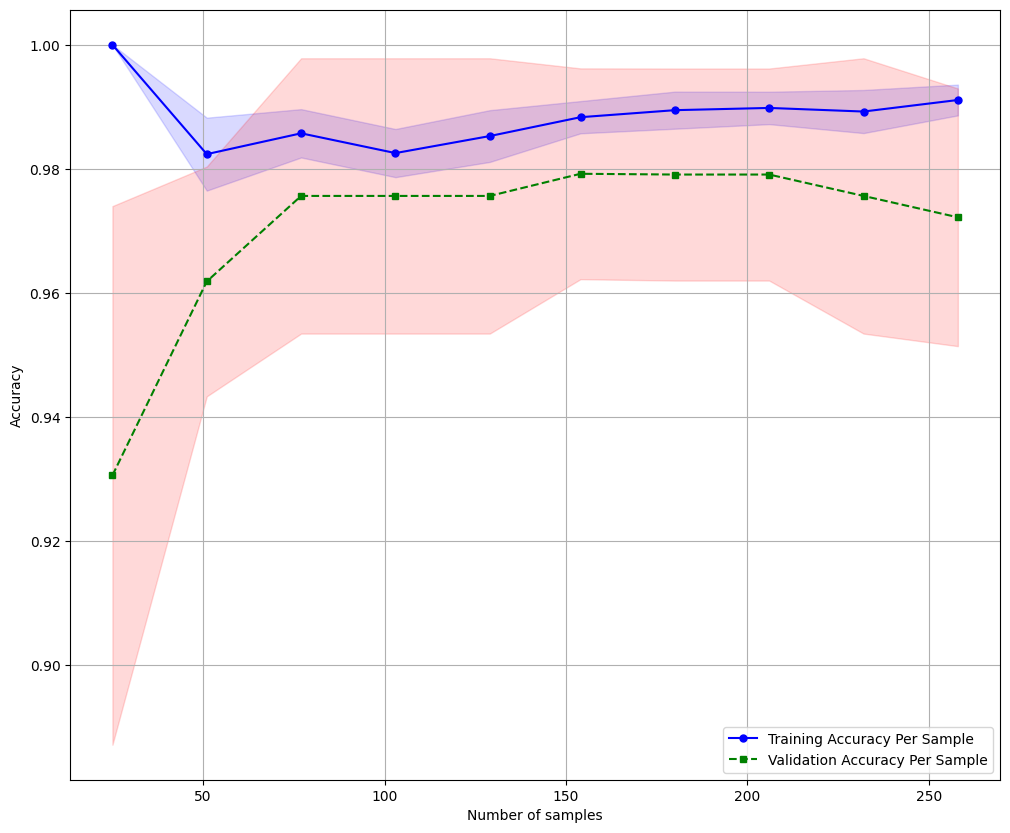

Confusion Matrix
[[ 51  13]
 [  0 107]]
Accuracy: 0.9240, Precision: 0.8917, Recall: 1.0000, F1: 0.9427, AUC: 0.9898


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'dbscan', outlier_params)

helper.train_and_evaluate_model('svc', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)